Cargamos librerias y datos

In [281]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import *
import tensorflow as tf
import seaborn as sns


path = "C:/data/"
df = pd.read_csv(path + "newData_EstresAbiotico3.csv" , sep=",")
df=df.drop(columns=['label','ph'])
df

####### EDA analisis explorartorio de los datos.

,N,P,K,temperature,humidity,rainfall
0,90,42,43,20.879744,82.002744,202.935536
1,85,58,41,21.770462,80.319644,226.655537
2,60,55,44,23.004459,82.320763,263.964248
3,74,35,40,26.491096,80.158363,242.864034
4,78,42,42,20.130175,81.604873,262.717340
...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,177.774507
2196,99,15,27,27.417112,56.636362,127.924610
2197,118,33,30,24.131797,67.225123,173.322839
2198,117,32,34,26.272418,52.127394,127.175293


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   rainfall     2200 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 103.2 KB


In [283]:
df.describe()

,N,P,K,temperature,humidity,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,298.560117


In [284]:
def show_null(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    display(missing_data)
show_null(df)

,Total,Percent
N,0,0.0
P,0,0.0
K,0,0.0
temperature,0,0.0
humidity,0,0.0
rainfall,0,0.0


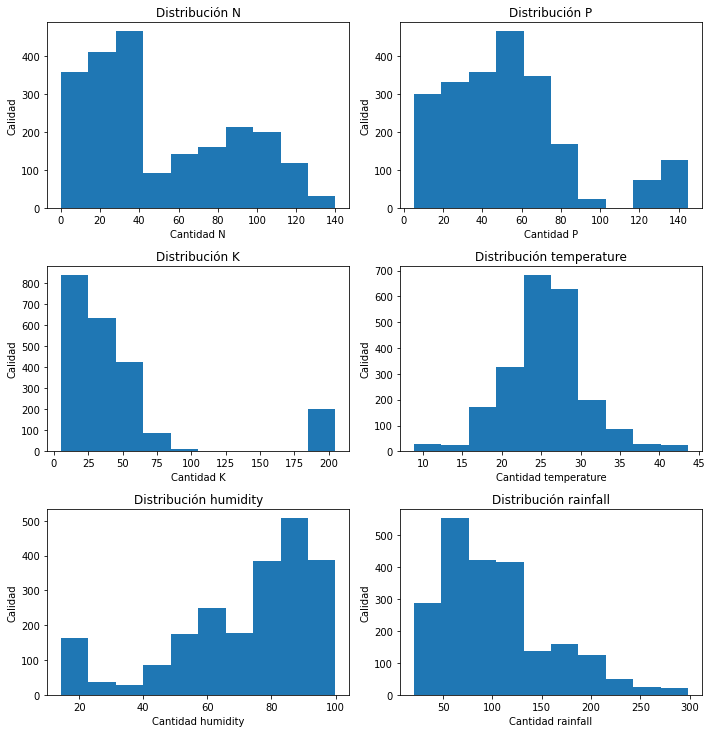

In [285]:
plt.figure(figsize=(10,20))
pos = 1
for i in df.columns:
    plt.subplot(6,2,pos)
    if i == "label":
        un, count = np.unique(df.label,return_counts=True)
        plt.xlabel("Crop")
        plt.ylabel("Count")
        plt.title("Target Class Distribution")
        plt.barh([enc.classes_[i] for i in un], count)
    else:
        plt.title("Distribución " + i )
        plt.xlabel("Cantidad " + i)
        plt.ylabel("Calidad")
        plt.hist(df[i])
    pos=pos+1
plt.tight_layout()

correlacion matrix

Text(0.5, 1.0, 'Correlation Heatmap')

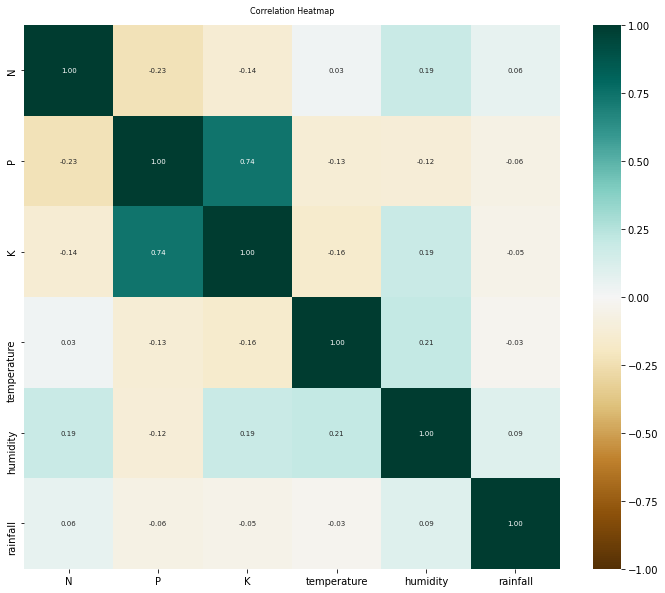

In [286]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BrBG', annot = True, fmt=".2f", annot_kws={"size":7})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12)

In [287]:
df = df.dropna()  # eliminamos los valores faltantes
#df = pd.get_dummies(df)  # codificamos las variables categóricas por los tipos de frutos
#scaler = StandardScaler()  # normalizamos las características
#df[df.columns] = scaler.fit_transform(df[df.columns])

# Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba

In [288]:
X = df[['temperature', 'humidity', 'rainfall','P','N','K']]  # seleccionamos las características
y = df[['K', 'P', 'N']]  # seleccionamos la salida

# Split the data into training, validation, and test sets

La razón por la que se divide el conjunto de datos en tres subconjuntos es para poder evaluar el rendimiento del modelo en diferentes etapas del proceso de entrenamiento. El conjunto de entrenamiento se utiliza para entrenar el modelo, el conjunto de validación se utiliza para evaluar el rendimiento del modelo durante el entrenamiento y ajustar los hiperparámetros, y el conjunto de prueba se utiliza para evaluar el rendimiento final del modelo una vez que ha sido entrenado.

In [289]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=1)  se está dividiendo el conjunto de datos "X" e "y" en dos partes: un conjunto de entrenamiento y un conjunto de validación. El conjunto de entrenamiento se llamará "X_train" e "y_train" y representará el 60% de los datos. El conjunto de validación se llamará "X_val" e "y_val" y representará el 40% restante de los datos. La división se realiza de manera aleatoria y fija, es decir, siempre se dividirán los datos de la misma manera si se utiliza el mismo valor para el argumento "random_state".

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=1)  se está dividiendo el conjunto de datos de validación "X_val" e "y_val" en dos partes: un conjunto de validación y un conjunto de prueba. El conjunto de validación seguirá siendo "X_val" e "y_val" y representará la mitad de los datos. El conjunto de prueba se llamará "X_test" e "y_test" y representará la otra mitad de los datos. La división se realiza de manera aleatoria y fija, es decir, siempre se dividirán los datos de la misma manera si se utiliza el mismo valor para el argumento "random_state"

# Dimenciones de cada array

In [290]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (1320, 6)
y_train shape: (1320, 3)
X_val shape: (440, 6)
y_val shape: (440, 3)
X_test shape: (440, 6)
y_test shape: (440, 3)


# Diseñamos la red neuronal
La última capa de un modelo de red neuronal suele utilizar una función de activación lineal cuando se trata de un problema de regresión. La función de activación lineal es una función que mapea cada entrada en una salida de forma lineal, es decir, sin aplicar ningún tipo de transformación a la entrada. Esto es útil en problemas de regresión porque el objetivo es predecir un valor numérico continuo, y la función de activación lineal permite que el modelo devuelva una salida sin restricciones.

In [291]:
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu', name='Capa_Entrada'))
model.add(Dense(150, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(3, activation='linear', name='Capa_salida'))
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae','accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Entrada (Dense)        (None, 6)                 42        
                                                                 
 dense_33 (Dense)            (None, 150)               1050      
                                                                 
 dense_34 (Dense)            (None, 300)               45300     
                                                                 
 dense_35 (Dense)            (None, 250)               75250     
                                                                 
 Capa_salida (Dense)         (None, 3)                 753       
                                                                 
Total params: 122,395
Trainable params: 122,395
Non-trainable params: 0
_________________________________________________________________


# Entrenamos la red neuronal

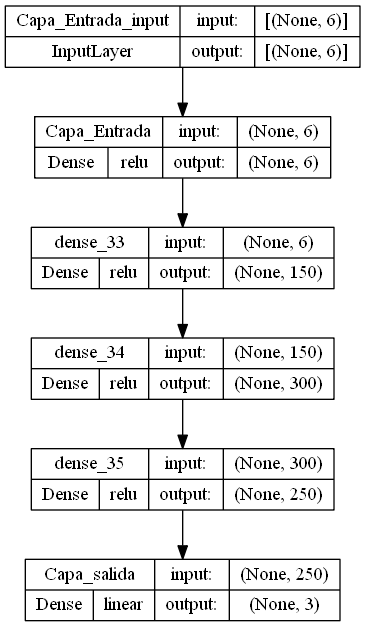

In [292]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True ,show_layer_activations=True )

In [293]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=200)
history = model.fit(X_train, y_train, epochs=200, callbacks=[callback], verbose=2, validation_data=(X_val, y_val))
#model.fit(X_train, y_train, epochs=20, verbose=2)

Epoch 1/200
42/42 - 1s - loss: 1111.5148 - mse: 1111.5148 - mae: 25.0765 - accuracy: 0.5030 - val_loss: 497.3495 - val_mse: 497.3495 - val_mae: 17.3975 - val_accuracy: 0.7477 - 804ms/epoch - 19ms/step
Epoch 2/200
42/42 - 0s - loss: 390.2772 - mse: 390.2772 - mae: 15.0652 - accuracy: 0.7545 - val_loss: 258.8757 - val_mse: 258.8757 - val_mae: 12.1105 - val_accuracy: 0.8159 - 180ms/epoch - 4ms/step
Epoch 3/200
42/42 - 0s - loss: 225.9472 - mse: 225.9472 - mae: 10.7040 - accuracy: 0.8083 - val_loss: 172.7246 - val_mse: 172.7246 - val_mae: 9.4334 - val_accuracy: 0.8568 - 126ms/epoch - 3ms/step
Epoch 4/200
42/42 - 0s - loss: 164.4445 - mse: 164.4445 - mae: 8.9305 - accuracy: 0.8424 - val_loss: 135.2772 - val_mse: 135.2772 - val_mae: 8.1627 - val_accuracy: 0.8636 - 88ms/epoch - 2ms/step
Epoch 5/200
42/42 - 0s - loss: 123.2954 - mse: 123.2954 - mae: 7.7657 - accuracy: 0.8508 - val_loss: 117.2358 - val_mse: 117.2358 - val_mae: 7.7253 - val_accuracy: 0.9114 - 95ms/epoch - 2ms/step
Epoch 6/200
42

# graficos de perdida enrte validacion vs entrenamiento

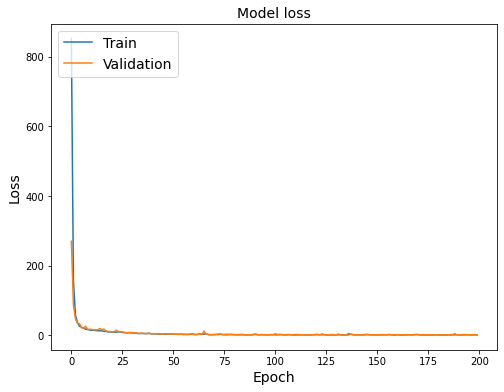

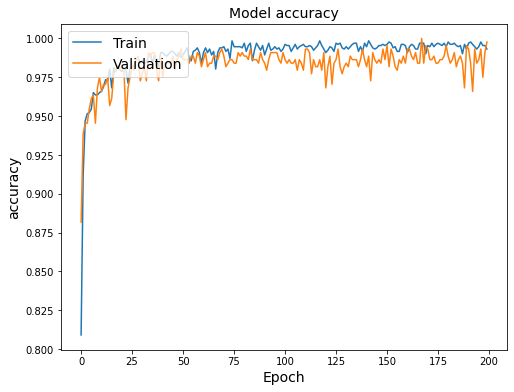

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss',fontsize = 14)
plt.ylabel('Loss',fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.legend(['Train', 'Validation'], loc='upper left', fontsize = 14)
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy',fontsize = 14)
plt.ylabel('accuracy',fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.legend(['Train', 'Validation'], loc='upper left', fontsize = 14)
plt.show()

# Hacemos predicciones con la red neuronal entrenada

In [ ]:
predictions = model.predict(X_test)

K_pred = predictions[:, 0]  # seleccionamos solo la columna de predicciones para K
K_true = y_test['K']  # seleccionamos la columna de valores verdaderos para K

mse_K = mean_squared_error(K_true, K_pred)
print(f'MSE para K: {mse_K}')
#Error cuadrático medio (MSE): El error cuadrático medio mide el error promedio entre 
#las predicciones del modelo y los valores reales. Se calcula como la suma de los errores al cuadrado dividida por el número de muestras.

mae_K = mean_absolute_error(K_true, K_pred)
print(f'MAE para K: {mae_K}')# Error absoluto medio (MAE): El error absoluto medio mide el error promedio entre 
#las predicciones del modelo y los valores reales. Se calcula como la suma de los errores absolutos dividida por el número de muestras.


r2_K = r2_score(K_true, K_pred) 
print(f'R2 para K: {r2_K}') #Coeficiente de determinación (R2): El coeficiente de determinación mide qué porcentaje 
#de la variabilidad en los datos es explicada por el modelo. Un valor más cercano a 1 indica un mejor rendimiento del modelo.


14/14 [==============================] - 0s 960us/step
MSE para K: 0.5924537736100609
MAE para K: 0.5586023222316395
R2 para K: 0.9997860595319723


In [ ]:
N_pred = predictions[:, 2]  # seleccionamos solo la columna de predicciones para N
N_true = y_test['N']  # seleccionamos la columna de valores verdaderos para N

mse_N = mean_squared_error(N_true, N_pred)
print(f'MSE para N: {mse_N}')

mae_N = mean_absolute_error(N_true, N_pred)
print(f'MAE para N: {mae_N}')

r2_N = r2_score(N_true, N_pred)
print(f'R2 para N: {r2_N}')

MSE para N: 0.957474394057264
MAE para N: 0.7333865517835048
R2 para N: 0.9993183453129845


In [ ]:
P_pred = predictions[:, 1]  # seleccionamos solo la columna de predicciones para P
P_true = y_test['P']  # seleccionamos la columna de valores verdaderos para P

mse_P = mean_squared_error(K_true, K_pred)
print(f'MSE para P: {mse_K}')

mae_P = mean_absolute_error(K_true, K_pred)
print(f'MAE para P: {mae_P}')

r2_P = r2_score(P_true, P_pred)
print(f'R2 para P: {r2_P}')

MSE para P: 0.5924537736100609
MAE para P: 0.5586023222316395
R2 para P: 0.9992766839431392


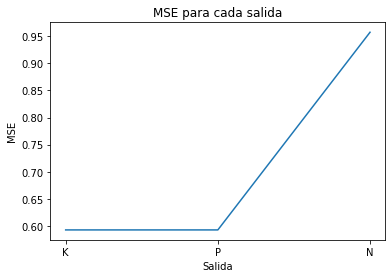

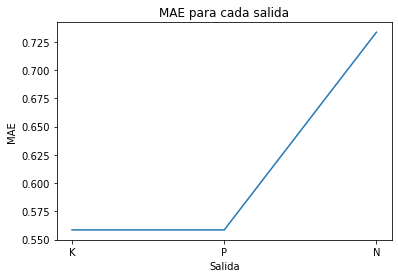

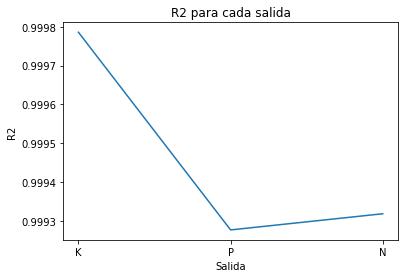

In [ ]:
# Graficar el MSE para cada una de las salidas
plt.plot([mse_K, mse_P, mse_N])
plt.xlabel('Salida')
plt.ylabel('MSE')
plt.xticks([0, 1, 2], ['K', 'P', 'N'])
plt.title('MSE para cada salida')
plt.show()

# Graficar el MAE para cada una de las salidas
plt.plot([mae_K, mae_P, mae_N])
plt.xlabel('Salida')
plt.ylabel('MAE')
plt.xticks([0, 1, 2], ['K', 'P', 'N'])
plt.title('MAE para cada salida')
plt.show()

# Graficar el r2 para cada una de las salidas
plt.plot([r2_K, r2_P, r2_N])
plt.xlabel('Salida')
plt.ylabel('R2')
plt.xticks([0, 1, 2], ['K', 'P', 'N'])
plt.title('R2 para cada salida')
plt.show()

# Revisamos K, P y N a partir de las predicciones

In [ ]:
K = predictions[0]
P = predictions[1]
N = predictions[2]

K,P,N

(array([46.410423,  8.865928, 88.90741 ], dtype=float32),
 array([197.74783 , 128.91289 ,  29.914347], dtype=float32),
 array([47.33802 , 21.827904, 92.50635 ], dtype=float32))

# Evaluamos el rendimiento de la red neuronal

In [ ]:
mse = model.evaluate(X_test, y_test, verbose=0) 
print(f'Test MSE: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R²  el coeficiente de determinación: {r2:.2f}') 

mae = mean_absolute_error(y_test, predictions) 
print(f'MAE: {mae:.2f}')

Test MSE: [0.7859926819801331, 0.7859926819801331, 0.6790045499801636, 0.9931818246841431]
R²  el coeficiente de determinación: 1.00
MAE: 0.68


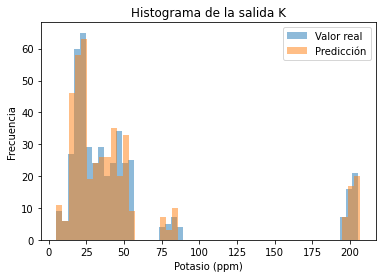

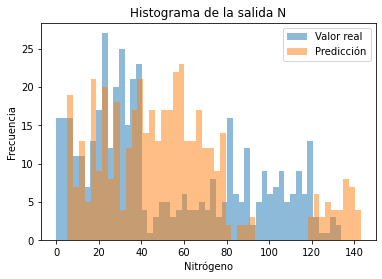

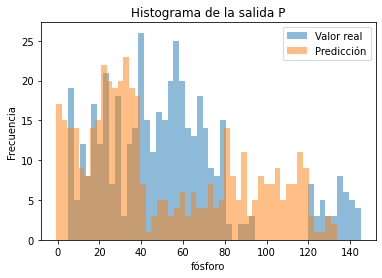

In [ ]:

plt.hist(y_test['K'], bins=50, alpha=0.5, label='Valor real')
plt.hist(predictions[:, 0], bins=50, alpha=0.5, label='Predicción')
plt.xlabel('Potasio (ppm)')
plt.ylabel('Frecuencia')
plt.title('Histograma de la salida K')
plt.legend()
plt.show()


plt.hist(y_test['N'], bins=50, alpha=0.5, label='Valor real')
plt.hist(predictions[:, 1], bins=50, alpha=0.5, label='Predicción')
plt.xlabel('Nitrógeno')
plt.ylabel('Frecuencia')
plt.title('Histograma de la salida N')
plt.legend()
plt.show()


plt.hist(y_test['P'], bins=50, alpha=0.5, label='Valor real')
plt.hist(predictions[:, 2], bins=50, alpha=0.5, label='Predicción')
plt.xlabel('fósforo')
plt.ylabel('Frecuencia')
plt.title('Histograma de la salida P')
plt.legend()
plt.show()


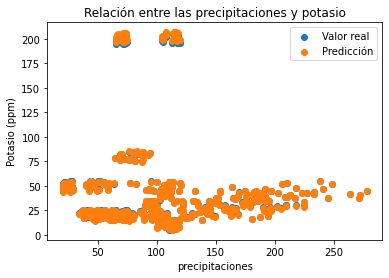

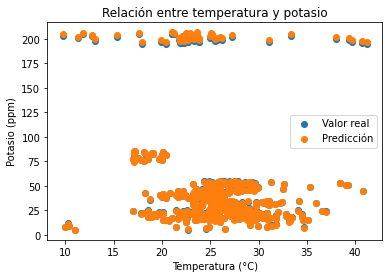

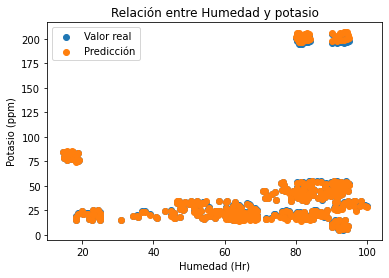

In [ ]:
plt.scatter(X_test['rainfall'], y_test['K'], label='Valor real')
plt.scatter(X_test['rainfall'], predictions[:, 0], label='Predicción')
plt.xlabel('precipitaciones')
plt.ylabel('Potasio (ppm)')
plt.title('Relación entre las precipitaciones y potasio')
plt.legend()
plt.show()

plt.scatter(X_test['temperature'], y_test['K'], label='Valor real')
plt.scatter(X_test['temperature'], predictions[:, 0], label='Predicción')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Potasio (ppm)')
plt.title('Relación entre temperatura y potasio')
plt.legend()
plt.show()

plt.scatter(X_test['humidity'], y_test['K'], label='Valor real')
plt.scatter(X_test['humidity'], predictions[:, 0], label='Predicción')
plt.xlabel('Humedad (Hr)')
plt.ylabel('Potasio (ppm)')
plt.title('Relación entre Humedad y potasio')
plt.legend()
plt.show()

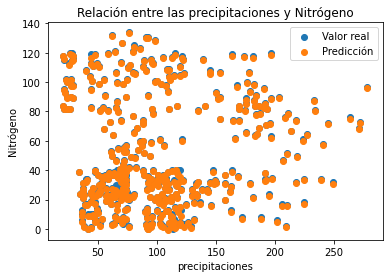

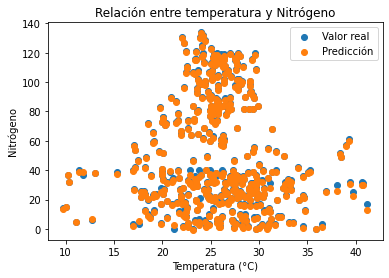

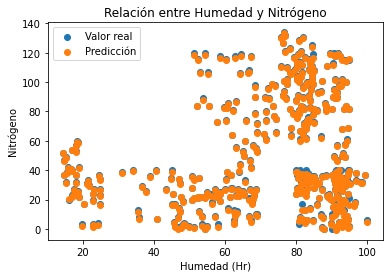

In [ ]:
plt.scatter(X_test['rainfall'], y_test['N'], label='Valor real')
plt.scatter(X_test['rainfall'], predictions[:, 2], label='Predicción')
plt.xlabel('precipitaciones')
plt.ylabel('Nitrógeno')
plt.title('Relación entre las precipitaciones y Nitrógeno')
plt.legend()
plt.show()

plt.scatter(X_test['temperature'], y_test['N'], label='Valor real')
plt.scatter(X_test['temperature'], predictions[:, 2], label='Predicción')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Nitrógeno')
plt.title('Relación entre temperatura y Nitrógeno')
plt.legend()
plt.show()

plt.scatter(X_test['humidity'], y_test['N'], label='Valor real')
plt.scatter(X_test['humidity'], predictions[:, 2], label='Predicción')
plt.xlabel('Humedad (Hr)')
plt.ylabel('Nitrógeno')
plt.title('Relación entre Humedad y Nitrógeno')
plt.legend()
plt.show()

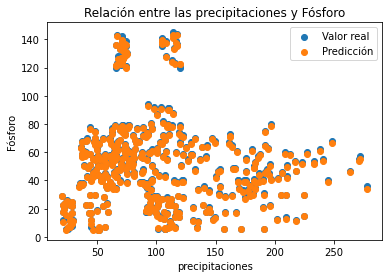

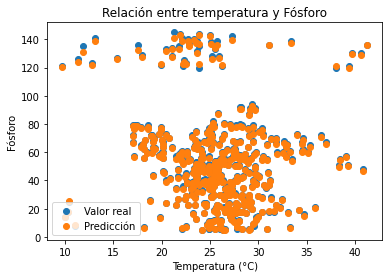

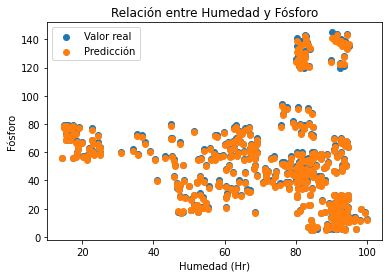

In [ ]:
plt.scatter(X_test['rainfall'], y_test['P'], label='Valor real')
plt.scatter(X_test['rainfall'], predictions[:, 1], label='Predicción')
plt.xlabel('precipitaciones')
plt.ylabel('Fósforo')
plt.title('Relación entre las precipitaciones y Fósforo')
plt.legend()
plt.show()

plt.scatter(X_test['temperature'], y_test['P'], label='Valor real')
plt.scatter(X_test['temperature'], predictions[:, 1], label='Predicción')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Fósforo')
plt.title('Relación entre temperatura y Fósforo')
plt.legend()
plt.show()

plt.scatter(X_test['humidity'], y_test['P'], label='Valor real')
plt.scatter(X_test['humidity'], predictions[:, 1], label='Predicción')
plt.xlabel('Humedad (Hr)')
plt.ylabel('Fósforo')
plt.title('Relación entre Humedad y Fósforo')
plt.legend()
plt.show()



#obtenemos los pesos y por cada prediccion y los calculamos.

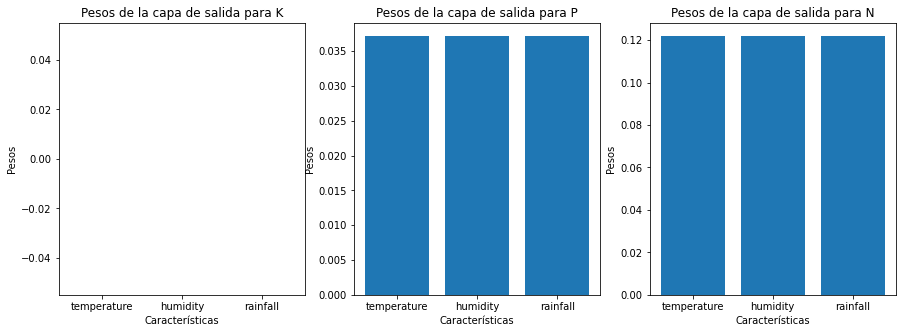

In [ ]:
weights = model.get_weights()[3]

# Creamos una figura
fig = plt.figure(figsize=(15, 5))

# Creamos un eje para cada variable de salida
ax1 = fig.add_subplot(131)  # el argumento (131) significa que se creará un eje en la fila 1, columna 1
ax2 = fig.add_subplot(132)  # el argumento (132) significa que se creará un eje en la fila 1, columna 2
ax3 = fig.add_subplot(133)  # el argumento (133) significa que se creará un eje en la fila 1, columna 3

# Creamos las barras para cada variable de salida
bar1 = ax1.bar(['temperature', 'humidity', 'rainfall'], weights[0])
bar2 = ax2.bar(['temperature', 'humidity', 'rainfall'], weights[1])
bar3 = ax3.bar(['temperature', 'humidity', 'rainfall'], weights[2])

# Añadimos títulos a cada eje
ax1.set_title('Pesos de la capa de salida para K')
ax1.set_xlabel('Características')
ax1.set_ylabel('Pesos')

ax2.set_title('Pesos de la capa de salida para P')
ax2.set_xlabel('Características')
ax2.set_ylabel('Pesos')

ax3.set_title('Pesos de la capa de salida para N')
ax3.set_xlabel('Características')
ax3.set_ylabel('Pesos')

# Mostramos la figura
plt.show()




Esta función recibe como parámetros dos arrays con los datos a comparar y devuelve dos valores: el coeficiente de correlación y el p-valor.

La correlación de Pearson es una medida de la correlación lineal entre dos variables. Se calcula como el coeficiente de correlación lineal entre ellas y toma valores entre -1 y 1. Un valor de 1 indica una correlación perfecta y positiva, es decir, que a medida que una variable aumenta, la otra también aumenta de manera proporcional. Un valor de -1 indica una correlación perfecta y negativa, es decir, que a medida que una variable aumenta, la otra disminuye de manera proporcional. Un valor de 0 indica que no hay correlación entre las variables.

Correlación de Pearson para K: 0.9999619462831849 (p-valor: 0.0)
Correlación de Pearson para P: 0.9998622059015535 (p-valor: 0.0)
Correlación de Pearson para N: 0.99983034460742 (p-valor: 0.0)


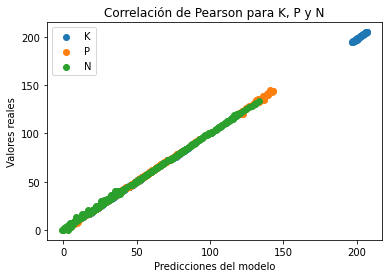

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Calcular la correlación de Pearson para K
k_predictions = predictions[:, 0]
k_real = y_test['K']
k_corr, k_pval = pearsonr(k_predictions, k_real)

# Calcular la correlación de Pearson para P
p_predictions = predictions[:, 1]
p_real = y_test['P']
p_corr, p_pval = pearsonr(p_predictions, p_real)

# Calcular la correlación de Pearson para N
n_predictions = predictions[:, 2]
n_real = y_test['N']
n_corr, n_pval = pearsonr(n_predictions, n_real)

# Mostrar los resultados
print(f'Correlación de Pearson para K: {k_corr} (p-valor: {k_pval})')
print(f'Correlación de Pearson para P: {p_corr} (p-valor: {p_pval})')
print(f'Correlación de Pearson para N: {n_corr} (p-valor: {n_pval})')

# Dibujar el gráfico de dispersión para K
plt.scatter(k_predictions, k_real, label='K')

# Dibujar el gráfico de dispersión para P
plt.scatter(p_predictions, p_real, label='P')

# Dibujar el gráfico de dispersión para N
plt.scatter(n_predictions, n_real, label='N')

# Añadir etiquetas y título al gráfico
plt.xlabel('Predicciones del modelo')
plt.ylabel('Valores reales')
plt.title('Correlación de Pearson para K, P y N')
plt.legend()
plt.show()

 Los resultados muestran que existe una correlación muy alta entre las predicciones del modelo y los valores reales de las variables K, P y N. Los valores de la correlación de Pearson son muy cercanos a 1, lo que indica una correlación positiva y muy fuerte. Además, los p-valores son muy pequeños, lo que sugiere que esta correlación es estadísticamente significativa y no es el resultado del azar.

Estos resultados indican que el modelo está haciendo predicciones muy precisas para estas variables y que existe una fuerte relación lineal entre las predicciones del modelo y los valores reales. Esto es una buena señal y sugiere que el modelo puede ser útil para predecir el valor de estas variables en el futuro. Sin embargo, es importante tener en cuenta que la correlación de Pearson solo mide la correlación lineal y no puede detectar otras formas de correlación. Por lo tanto, es posible que el modelo pueda tener un rendimiento peor en casos en los que la relación entre las variables no sea lineal.

Coeficiente de Pearson: -0.119
Valor-p: 0.000


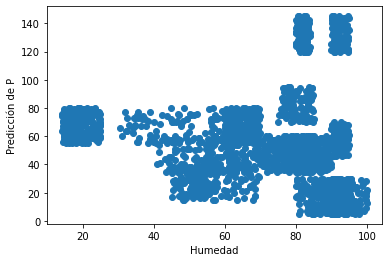

Coeficiente de Pearson: 0.191
Valor-p: 0.000


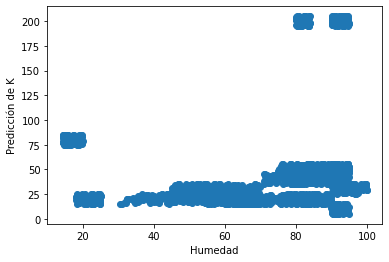

Coeficiente de Pearson: 0.191
Valor-p: 0.000


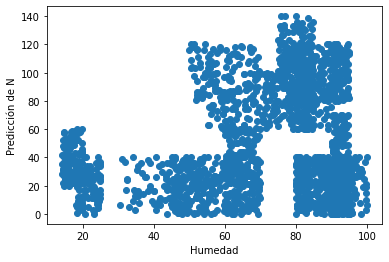

In [ ]:
humidity = X['humidity'].values
prediction_P = y['P'].values

r, p = pearsonr(humidity, prediction_P)
print(f'Coeficiente de Pearson: {r:.3f}')
print(f'Valor-p: {p:.3f}')

plt.scatter(humidity, prediction_P)
plt.xlabel('Humedad')
plt.ylabel('Predicción de P')
plt.show()

humidity = X['humidity'].values
prediction_k = y['K'].values

r, p = pearsonr(humidity, prediction_k)
print(f'Coeficiente de Pearson: {r:.3f}')
print(f'Valor-p: {p:.3f}')

plt.scatter(humidity, prediction_k)
plt.xlabel('Humedad')
plt.ylabel('Predicción de K')
plt.show()

humidity = X['humidity'].values
prediction_N = y['N'].values

r, p = pearsonr(humidity, prediction_N)
print(f'Coeficiente de Pearson: {r:.3f}')
print(f'Valor-p: {p:.3f}')

plt.scatter(humidity, prediction_N)
plt.xlabel('Humedad')
plt.ylabel('Predicción de N')
plt.show()